## 2 Phase Relative Permeability correlations 

> Divyanshu Vyas | Oil & Gas Data Science/Machine Learning

### Example 1 :  Wyllie and Gardner method
Generate the drainage relative permeability data for an **unconsolidated
well-sorted sand**. Assume the
following critical saturation values:

> Soc = 0.3, Swc = 0.25, Sgc = 0.05

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
sw = np.linspace(0.25,0.70,100)

Swc = 0.25

Soc = 0.3

Sgc = 0.05

In [13]:
df_wg = pd.DataFrame(data=sw , columns=['Sw'])

In [18]:
df_wg['Sw*'] = (df_wg['Sw'] - Swc)/(1-Swc)

df_wg['Kro'] = (1 - df_wg['Sw*'])**3

df_wg['Krw'] = df_wg['Sw*']**3

In [19]:
df_wg

,Sw,Sw*,Kro,Krw
0,0.250000,0.000000,1.000000,0.000000e+00
1,0.254545,0.006061,0.981928,2.226118e-07
2,0.259091,0.012121,0.964075,1.780894e-06
3,0.263636,0.018182,0.946440,6.010518e-06
4,0.268182,0.024242,0.929022,1.424715e-05
...,...,...,...,...
95,0.681818,0.575758,0.076356,1.908618e-01
96,0.686364,0.581818,0.073130,1.969527e-01
97,0.690909,0.587879,0.069996,2.031718e-01
98,0.695455,0.593939,0.066953,2.095204e-01


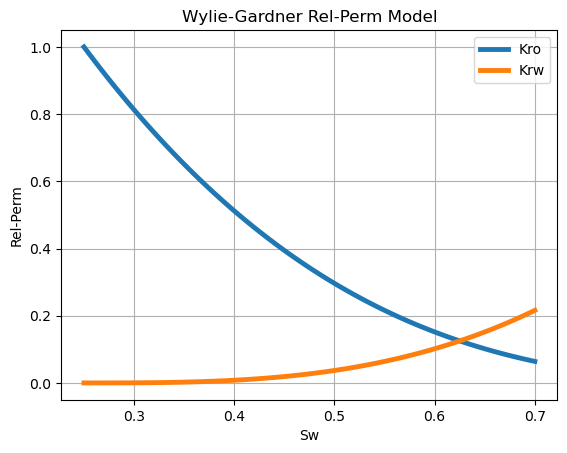

In [31]:
plt.style.use('default')

plt.plot(df_wg['Sw'] , df_wg['Kro'], lw=3.5,label ='Kro')
plt.plot(df_wg['Sw'] , df_wg['Krw'], lw=3.5,label='Krw')

# plt.xlim(0,1)

plt.xlabel('Sw')
plt.ylabel('Rel-Perm')
plt.title('Wylie-Gardner Rel-Perm Model')

plt.legend()
plt.grid()

## Example 2. Pirson's Correlation

In [33]:
df_p = pd.DataFrame(data=sw, columns=['Sw'])

In [41]:
df_p['Sw*'] = (df_p['Sw'] - Swc)/(1-Swc)

df_p['Krw'] = np.sqrt(df_p['Sw*'])*df_p['Sw']**3

df_p['Kro'] = (1 - df_p['Sw*'])*np.sqrt(1 - (df_p['Sw*']**0.25)*np.sqrt(df_p['Sw']))

In [42]:
df_p

,Sw,Sw*,Krw,Kro
0,0.250000,0.000000,0.000000,1.000000
1,0.254545,0.006061,0.001284,0.921328
2,0.259091,0.012121,0.001915,0.900600
3,0.263636,0.018182,0.002471,0.884430
4,0.268182,0.024242,0.003003,0.870372
...,...,...,...,...
95,0.681818,0.575758,0.240506,0.224779
96,0.686364,0.581818,0.246636,0.219870
97,0.690909,0.587879,0.252875,0.215002
98,0.695455,0.593939,0.259225,0.210173


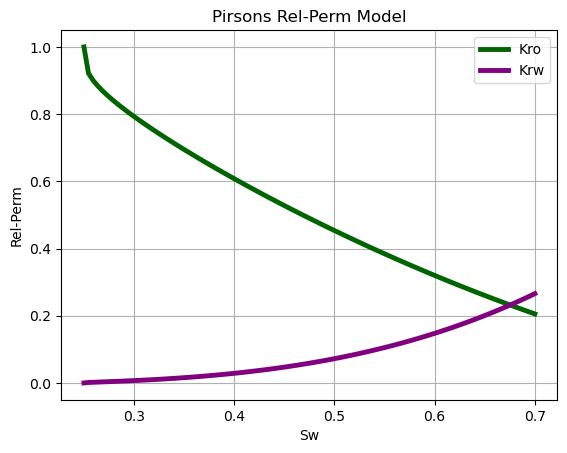

In [48]:
plt.style.use('default')

plt.plot(df_p['Sw'] , df_p['Kro'], lw=3.5,label ='Kro',color='darkgreen')
plt.plot(df_p['Sw'] , df_p['Krw'], lw=3.5,label='Krw', color='purple')

# plt.xlim(0,1)

plt.xlabel('Sw')
plt.ylabel('Rel-Perm')
plt.title('Pirsons Rel-Perm Model')

plt.legend()
plt.grid()

### Example 3 : Corey's Model

>Use Corey’s approximation to generate the gas-oil relative permeability for a formation with a connate water saturation of 0.25

In [50]:
sg = np.linspace(0.05,0.70,100)

swc = 0.25

In [52]:
sg_star = sg/(1-swc)

In [53]:
kro = (1-sg_star)**4

In [54]:
krg = sg_star**3 * (2 - sg_star)

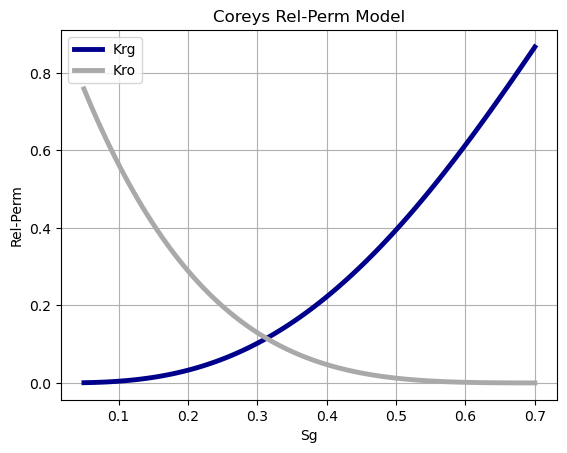

In [63]:
plt.plot(sg, krg,label='Krg',lw=3.5,color='darkblue')
plt.plot(sg,kro,label='Kro',lw=3.5,color='darkgrey')


plt.xlabel('Sg')
plt.ylabel('Rel-Perm')
plt.title('Coreys Rel-Perm Model')

plt.legend()
plt.grid()